In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


2025-08-26 19:40:42.068093: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756237242.393810      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756237242.510491      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Training fold 1 ...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-26 19:41:02.059051: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Fold 1 - Loss: 0.35937806963920593 - Accuracy: 0.8479999899864197
Training fold 2 ...
Fold 2 - Loss: 0.33027490973472595 - Accuracy: 0.8669999837875366
Training fold 3 ...
Fold 3 - Loss: 0.32812684774398804 - Accuracy: 0.8610000014305115
Training fold 4 ...
Fold 4 - Loss: 0.3987158536911011 - Accuracy: 0.8379999995231628
Training fold 5 ...
Fold 5 - Loss: 0.34112629294395447 - Accuracy: 0.8610000014305115
Training fold 6 ...
Fold 6 - Loss: 0.3407922685146332 - Accuracy: 0.8650000095367432
Training fold 7 ...
Fold 7 - Loss: 0.34211015701293945 - Accuracy: 0.8640000224113464
Training fold 8 ...
Fold 8 - Loss: 0.35568490624427795 - Accuracy: 0.8640000224113464
Training fold 9 ...
Fold 9 - Loss: 0.33541083335876465 - Accuracy: 0.8510000109672546
Training fold 10 ...
Fold 10 - Loss: 0.34574612975120544 - Accuracy: 0.8579999804496765
Average accuracy: 0.8577000021934509
Average loss: 0.3477366268634796


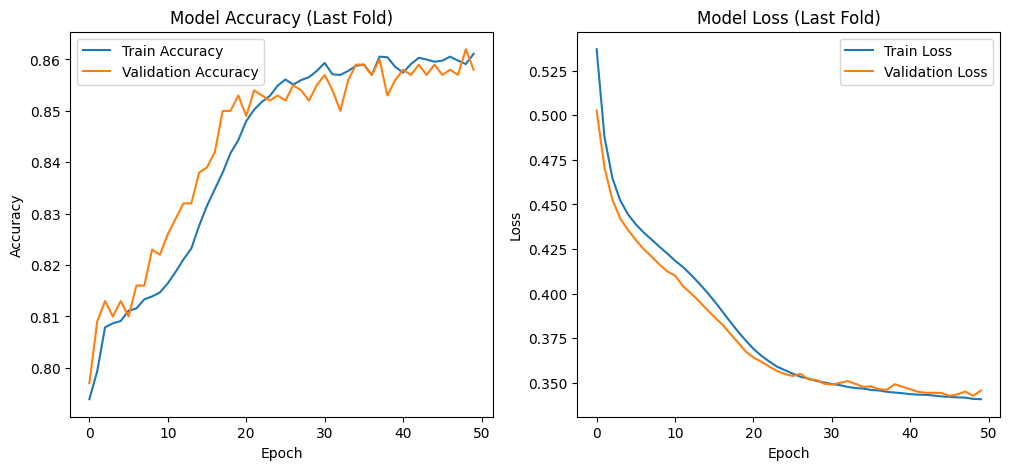

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset
data = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

# Preprocessing
X = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = data['Exited']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to numpy
X_scaled = np.array(X_scaled)
y = np.array(y)

# Define function to build ANN
def build_model():
    model = Sequential()
    model.add(Dense(10, activation='relu', input_dim=X_scaled.shape[1]))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 10-Fold Cross Validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
fold_no = 1
history_list = []
acc_per_fold = []
loss_per_fold = []

for train_idx, val_idx in kf.split(X_scaled, y):
    print(f"Training fold {fold_no} ...")
    
    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    
    model = build_model()
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, 
                        validation_data=(X_val, y_val), verbose=0)
    
    # Save history
    history_list.append(history)
    
    # Evaluate
    scores = model.evaluate(X_val, y_val, verbose=0)
    print(f"Fold {fold_no} - Loss: {scores[0]} - Accuracy: {scores[1]}")
    
    acc_per_fold.append(scores[1])
    loss_per_fold.append(scores[0])
    
    fold_no += 1

# Average performance
print("Average accuracy:", np.mean(acc_per_fold))
print("Average loss:", np.mean(loss_per_fold))

# Plot training vs validation accuracy/loss for the last fold
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history_list[-1].history['accuracy'], label='Train Accuracy')
plt.plot(history_list[-1].history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (Last Fold)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history_list[-1].history['loss'], label='Train Loss')
plt.plot(history_list[-1].history['val_loss'], label='Validation Loss')
plt.title('Model Loss (Last Fold)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
